# Fuzzy

## Antecedentes (entradas)
* Serviço: que nota você dataia para o serviço, em uma escala de 0 a 10?
    * ruim, aceitável, ótimo
* Qualidade da comida: Quão boa estava a comida, em uma escala de 0 a 10?
    * ruim, boa, saborosa

## Consequentes (saída)
* Gorjeta: Quanto de gorjeta você daria entre 0% a 20%?
    * baixa, média, alta

## Regras

* Se a qualidade da comida for *ruim* ou o serviço for *ruim* então a gorjeta será baixa.
* Se o serviço for *médio* então a gorjeta será *média*.
* Se o serviço for bom e a qualidade da comida for *boa*, então a gorjeta será *alta*

In [54]:
%pip install scikit-fuzzy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [55]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control


In [56]:
qualidade = control.Antecedent(np.arange(0,11, 1), 'qualidade')
servico = control.Antecedent(np.arange(0,11, 1), 'servico')

In [57]:
gorjeta = control.Consequent(np.arange(0,21), 'gorjeta')

## Membership functions

In [58]:
qualidade.automf(number=3, names=['ruim', 'boa', 'saborosa'])
servico.automf(number=3, names=['ruim', 'aceitavel', 'otimo'])

/home/cassianodess/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/cassianodess/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/cassianodess/.local/lib/python3.10/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/cassianodess/.local/lib/python3.10/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


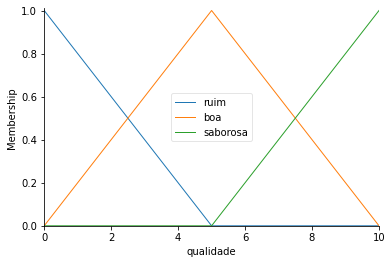

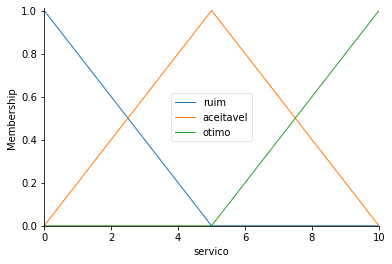

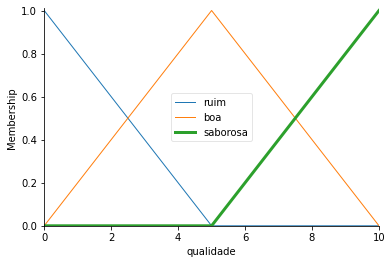

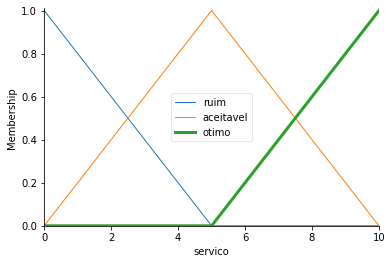

In [59]:
qualidade.view()
servico.view()

qualidade['saborosa'].view()
servico['otimo'].view()

/home/cassianodess/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


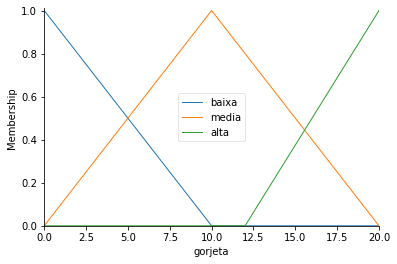

In [60]:
gorjeta['baixa'] = fuzzy.trimf(gorjeta.universe, [0,0,10])
gorjeta['media'] = fuzzy.trimf(gorjeta.universe, [0,10,20])
gorjeta['alta'] = fuzzy.trimf(gorjeta.universe, [12,20,20])
gorjeta.view()

In [61]:
regra1 = control.Rule(qualidade['ruim'] | servico['ruim'], gorjeta['baixa'])
regra2 = control.Rule(servico['aceitavel'], gorjeta['media'])
regra3 = control.Rule(servico['otimo'] | qualidade['saborosa'], gorjeta['alta'])

## Sistema de controle

In [62]:
sistema_controle = control.ControlSystem([regra1, regra2, regra3])
sistema = control.ControlSystemSimulation(sistema_controle)

17.333333333333332


/home/cassianodess/.local/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


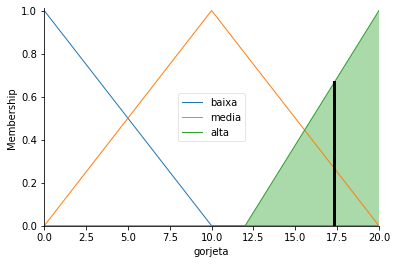

In [64]:
sistema.input['qualidade'] = 10
sistema.input['servico'] = 10
sistema.compute()
print(sistema.output['gorjeta'])
gorjeta.view(sim = sistema)